## 2. Load Data


In [2]:
# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: (299, 13)

First few rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 3. Basic Data Inspection


In [3]:
# Display basic information
print("Dataset Information:")
print("=" * 50)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 

In [4]:
# Check for missing values
print("\nMissing Values:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")



Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found in the dataset!


In [5]:
# Check for duplicates
print("\nDuplicate Rows:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✓ No duplicate rows found!")



Duplicate Rows:
Number of duplicate rows: 0
✓ No duplicate rows found!


In [6]:
# Statistical summary
print("\nStatistical Summary:")
print("=" * 50)
df.describe().round(2)



Statistical Summary:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


## 4. Key Statistics Table


In [7]:
# Create comprehensive statistics table
stats_table = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Missing Values': df.isnull().sum().values,
    'Unique Values': df.nunique().values,
    'Mean': df.mean(numeric_only=True).reindex(df.columns).values,
    'Std': df.std(numeric_only=True).reindex(df.columns).values,
    'Min': df.min(numeric_only=True).reindex(df.columns).values,
    'Max': df.max(numeric_only=True).reindex(df.columns).values
})

print("\nComprehensive Statistics Table:")
print("=" * 100)
stats_table.style.format({
    'Mean': '{:.2f}',
    'Std': '{:.2f}',
    'Min': '{:.2f}',
    'Max': '{:.2f}'
})



Comprehensive Statistics Table:


,Feature,Data Type,Non-Null Count,Missing Values,Unique Values,Mean,Std,Min,Max
0,age,float64,299,0,47,60.83,11.89,40.00,95.00
1,anaemia,int64,299,0,2,0.43,0.50,0.00,1.00
2,creatinine_phosphokinase,int64,299,0,208,581.84,970.29,23.00,7861.00
3,diabetes,int64,299,0,2,0.42,0.49,0.00,1.00
4,ejection_fraction,int64,299,0,17,38.08,11.83,14.00,80.00
5,high_blood_pressure,int64,299,0,2,0.35,0.48,0.00,1.00
6,platelets,float64,299,0,176,263358.03,97804.24,25100.00,850000.00
7,serum_creatinine,float64,299,0,40,1.39,1.03,0.50,9.40
8,serum_sodium,int64,299,0,27,136.63,4.41,113.00,148.00
9,sex,int64,299,0,2,0.65,0.48,0.00,1.00


## 5. Data Visualizations


### 5.1 Target Distribution (DEATH_EVENT)


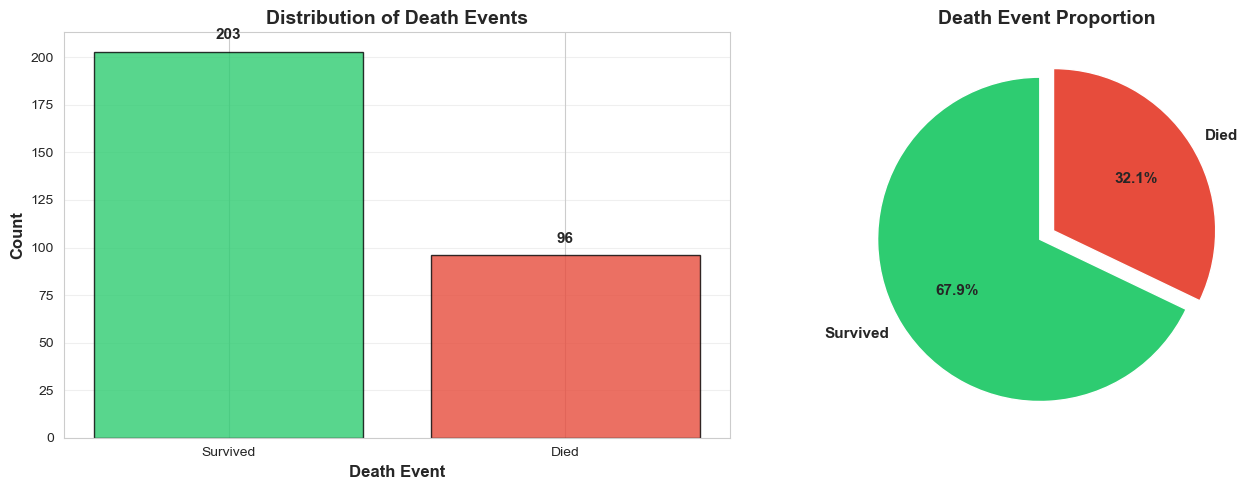


Target Variable Statistics:
Total patients: 299
Survived: 203 (67.9%)
Died: 96 (32.1%)
Class Imbalance Ratio: 2.11:1


In [8]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
death_counts = df['DEATH_EVENT'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(death_counts.index, death_counts.values, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Death Event', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Death Events', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Survived', 'Died'])
axes[0].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (idx, val) in enumerate(death_counts.items()):
    axes[0].text(idx, val + 5, str(val), ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(death_counts.values, labels=['Survived', 'Died'], autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.05, 0.05],
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Death Event Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("\nTarget Variable Statistics:")
print("=" * 50)
print(f"Total patients: {len(df)}")
print(f"Survived: {death_counts[0]} ({death_counts[0]/len(df)*100:.1f}%)")
print(f"Died: {death_counts[1]} ({death_counts[1]/len(df)*100:.1f}%)")
print(f"Class Imbalance Ratio: {death_counts[0]/death_counts[1]:.2f}:1")


### 5.2 Age Distribution by Outcome


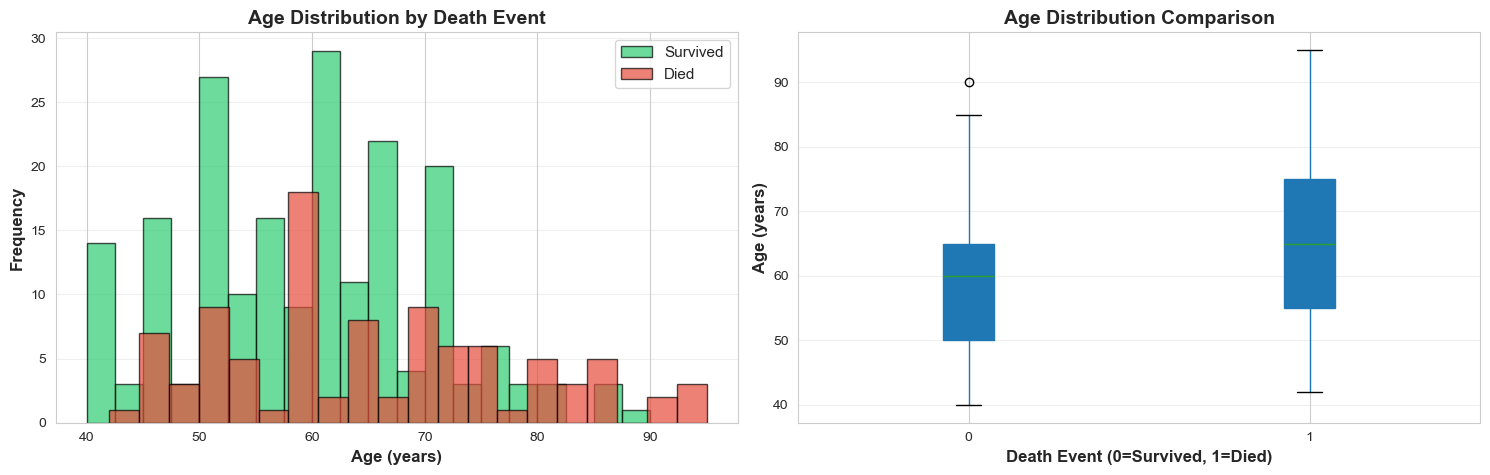


Age Statistics by Outcome:
Survived - Mean: 58.8 years, Median: 60.0 years, Std: 10.6
Died - Mean: 65.2 years, Median: 65.0 years, Std: 13.2

Age difference (Died - Survived): 6.5 years


In [9]:
# Age distribution by death event
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram with overlay
survived = df[df['DEATH_EVENT'] == 0]['age']
died = df[df['DEATH_EVENT'] == 1]['age']

axes[0].hist(survived, bins=20, alpha=0.7, label='Survived', color='#2ecc71', edgecolor='black')
axes[0].hist(died, bins=20, alpha=0.7, label='Died', color='#e74c3c', edgecolor='black')
axes[0].set_xlabel('Age (years)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Age Distribution by Death Event', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
df.boxplot(column='age', by='DEATH_EVENT', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Death Event (0=Survived, 1=Died)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Age (years)', fontsize=12, fontweight='bold')
axes[1].set_title('Age Distribution Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nAge Statistics by Outcome:")
print("=" * 50)
print(f"Survived - Mean: {survived.mean():.1f} years, Median: {survived.median():.1f} years, Std: {survived.std():.1f}")
print(f"Died - Mean: {died.mean():.1f} years, Median: {died.median():.1f} years, Std: {died.std():.1f}")
print(f"\nAge difference (Died - Survived): {died.mean() - survived.mean():.1f} years")


### 5.3 Correlation Heatmap


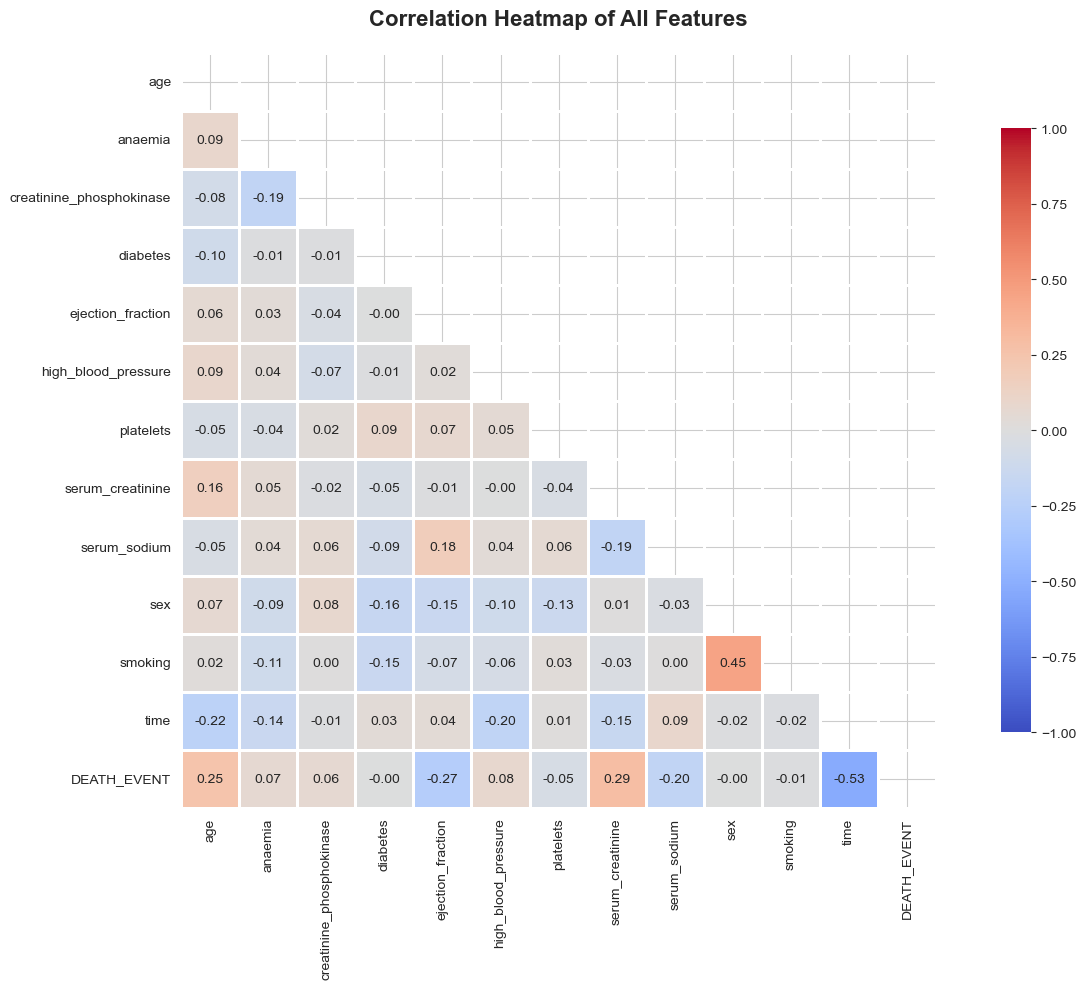


Features Correlation with DEATH_EVENT:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964

Top Positive Correlations with Death:
serum_creatinine       0.294278
age                    0.253729
high_blood_pressure    0.079351
Name: DEATH_EVENT, dtype: float64

Top Negative Correlations with Death:
time                -0.526964
ejection_fraction   -0.268603
serum_sodium        -0.195204
Name: DEATH_EVENT, dtype: float64


In [10]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show features most correlated with DEATH_EVENT
print("\nFeatures Correlation with DEATH_EVENT:")
print("=" * 50)
death_corr = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
print(death_corr.to_string())

# Identify top positive and negative correlations
print("\nTop Positive Correlations with Death:")
print(death_corr[death_corr > 0].sort_values(ascending=False)[1:4])
print("\nTop Negative Correlations with Death:")
print(death_corr[death_corr < 0].sort_values()[0:3])


### 5.4 Ejection Fraction vs Mortality


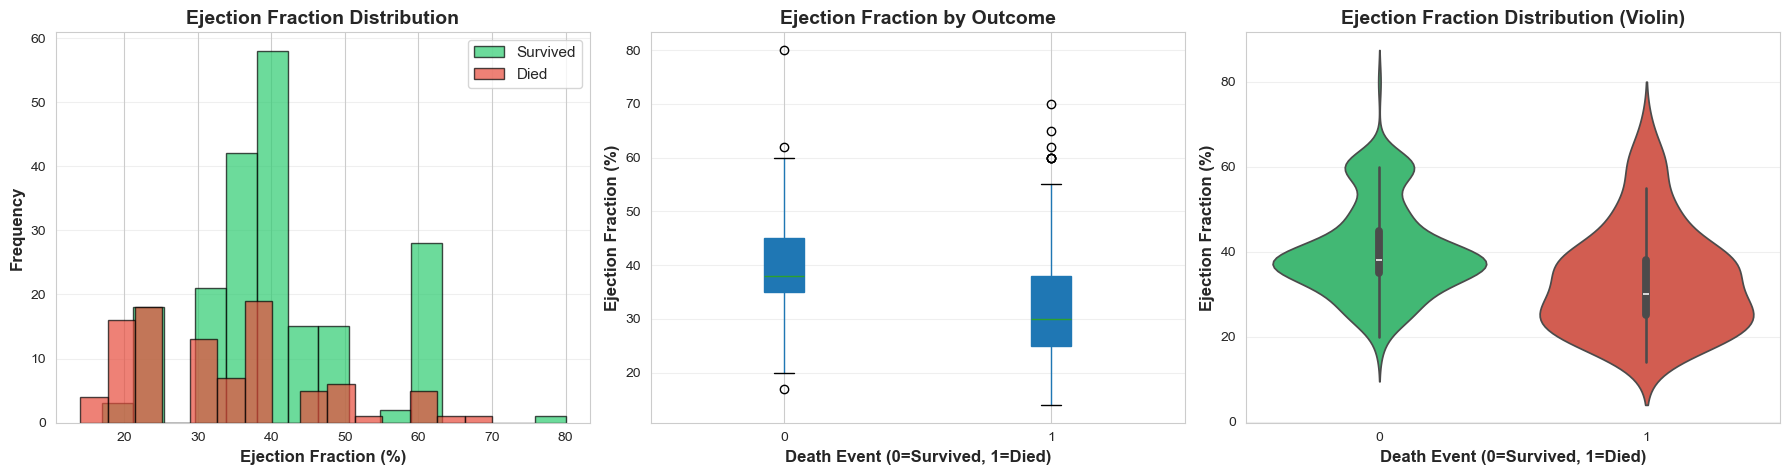


Ejection Fraction Statistics by Outcome:
Survived - Mean: 40.3%, Median: 38.0%, Std: 10.9
Died - Mean: 33.5%, Median: 30.0%, Std: 12.5

Difference (Survived - Died): 6.8%


In [11]:
# Ejection fraction analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution by outcome
survived_ef = df[df['DEATH_EVENT'] == 0]['ejection_fraction']
died_ef = df[df['DEATH_EVENT'] == 1]['ejection_fraction']

axes[0].hist(survived_ef, bins=15, alpha=0.7, label='Survived', color='#2ecc71', edgecolor='black')
axes[0].hist(died_ef, bins=15, alpha=0.7, label='Died', color='#e74c3c', edgecolor='black')
axes[0].set_xlabel('Ejection Fraction (%)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Ejection Fraction Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
df.boxplot(column='ejection_fraction', by='DEATH_EVENT', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Death Event (0=Survived, 1=Died)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Ejection Fraction (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Ejection Fraction by Outcome', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
plt.suptitle('')

# Violin plot
sns.violinplot(data=df, x='DEATH_EVENT', y='ejection_fraction', ax=axes[2],
               palette=['#2ecc71', '#e74c3c'])
axes[2].set_xlabel('Death Event (0=Survived, 1=Died)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Ejection Fraction (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Ejection Fraction Distribution (Violin)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\nEjection Fraction Statistics by Outcome:")
print("=" * 50)
print(f"Survived - Mean: {survived_ef.mean():.1f}%, Median: {survived_ef.median():.1f}%, Std: {survived_ef.std():.1f}")
print(f"Died - Mean: {died_ef.mean():.1f}%, Median: {died_ef.median():.1f}%, Std: {died_ef.std():.1f}")
print(f"\nDifference (Survived - Died): {survived_ef.mean() - died_ef.mean():.1f}%")


# STEP 2: Train-Test Split + Feature Scaling

This section prepares the data for machine learning by:
- Separating features and target variable
- Performing 80/20 stratified train-test split
- Scaling features using StandardScaler
- Saving the scaler for future use


## 1. Import Required Libraries


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Separate Features and Target


In [13]:
# Separate features (X) and target (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

print("Features and Target Separated:")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\nTarget variable: DEATH_EVENT")
print(f"Target distribution:\n{y.value_counts()}")


Features and Target Separated:
Features shape: (299, 12)
Target shape: (299,)

Feature columns (12):
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

Target variable: DEATH_EVENT
Target distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


## 3. Train-Test Split (80/20 Stratified)


In [14]:
# Perform stratified train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Train-Test Split Completed:")
print("=" * 50)
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

print("\nTarget distribution in Training set:")
train_dist = y_train.value_counts()
print(f"  Survived: {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"  Died: {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")

print("\nTarget distribution in Test set:")
test_dist = y_test.value_counts()
print(f"  Survived: {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"  Died: {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

print("\n✓ Stratification maintained class balance!")


Train-Test Split Completed:
Training set size: 239 samples (79.9%)
Test set size: 60 samples (20.1%)

Target distribution in Training set:
  Survived: 162 (67.8%)
  Died: 77 (32.2%)

Target distribution in Test set:
  Survived: 41 (68.3%)
  Died: 19 (31.7%)

✓ Stratification maintained class balance!


## 4. Feature Scaling (StandardScaler)


In [15]:
# Initialize and fit StandardScaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Feature Scaling Completed:")
print("=" * 50)
print(f"Scaler: StandardScaler")
print(f"Fitted on: Training set only (prevent data leakage)")
print(f"\nScaled Training set shape: {X_train_scaled.shape}")
print(f"Scaled Test set shape: {X_test_scaled.shape}")

print("\nScaling Statistics (Training Set):")
print(f"Mean: {X_train_scaled.mean().mean():.6f} (should be ~0)")
print(f"Std: {X_train_scaled.std().mean():.6f} (should be ~1)")

print("\nFirst few rows of scaled training data:")
print(X_train_scaled.head())


Feature Scaling Completed:
Scaler: StandardScaler
Fitted on: Training set only (prevent data leakage)

Scaled Training set shape: (239, 12)
Scaled Test set shape: (60, 12)

Scaling Statistics (Training Set):
Mean: 0.000000 (should be ~0)
Std: 1.002099 (should be ~1)

First few rows of scaled training data:
          age   anaemia  creatinine_phosphokinase  diabetes  \
115 -0.269050  1.110696                 -0.200735 -0.900337   
23  -0.706883 -0.900337                 -0.534318  1.110696   
0    1.219579 -0.900337                 -0.020580 -0.900337   
247  0.256348 -0.900337                 -0.455129 -0.900337   
194 -1.407414 -0.900337                 -0.020580 -0.900337   

     ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
115           0.176528            -0.770281  -1.004722         -0.360437   
23            1.847425            -0.770281   1.051685         -0.544467   
0            -1.494369             1.298227   0.013401          0.467698   
247      

## 5. Save Scaler for Future Use


In [16]:
# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the scaler
scaler_path = 'models/scaler.pkl'
joblib.dump(scaler, scaler_path)

print("Scaler Saved:")
print("=" * 50)
print(f"Location: {scaler_path}")
print(f"File size: {os.path.getsize(scaler_path)} bytes")
print("\n✓ Scaler saved successfully for future use!")
print("  This scaler can be used to transform new data for predictions.")


Scaler Saved:
Location: models/scaler.pkl
File size: 1415 bytes

✓ Scaler saved successfully for future use!
  This scaler can be used to transform new data for predictions.


## 7. Final Data Summary


In [18]:
print("\n" + "="*70)
print("STEP 2: TRAIN-TEST SPLIT + FEATURE SCALING - SUMMARY")
print("="*70)

print("\n1. DATA SPLIT:")
print(f"   - Total samples: {len(df)}")
print(f"   - Training samples: {len(X_train_scaled)} (80%)")
print(f"   - Test samples: {len(X_test_scaled)} (20%)")
print(f"   - Split method: Stratified (maintains class balance)")

print("\n2. FEATURE SCALING:")
print(f"   - Scaler type: StandardScaler")
print(f"   - Number of features scaled: {len(X.columns)}")
print(f"   - Training set mean: {X_train_scaled.mean().mean():.6f}")
print(f"   - Training set std: {X_train_scaled.std().mean():.6f}")

print("\n3. CLASS DISTRIBUTION:")
print("   Training set:")
print(f"      - Survived: {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"      - Died: {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")
print("   Test set:")
print(f"      - Survived: {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"      - Died: {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

print("\n4. ARTIFACTS SAVED:")
print(f"   ✓ Scaler: {scaler_path}")

print("\n5. READY-TO-MODEL DATA:")
print("   ✓ X_train_scaled: Scaled training features")
print("   ✓ X_test_scaled: Scaled test features")
print("   ✓ y_train: Training labels")
print("   ✓ y_test: Test labels")

print("\n" + "="*70)
print("DATA PREPARATION COMPLETE - READY FOR MODEL TRAINING!")
print("="*70)



STEP 2: TRAIN-TEST SPLIT + FEATURE SCALING - SUMMARY

1. DATA SPLIT:
   - Total samples: 299
   - Training samples: 239 (80%)
   - Test samples: 60 (20%)
   - Split method: Stratified (maintains class balance)

2. FEATURE SCALING:
   - Scaler type: StandardScaler
   - Number of features scaled: 12
   - Training set mean: 0.000000
   - Training set std: 1.002099

3. CLASS DISTRIBUTION:
   Training set:
      - Survived: 162 (67.8%)
      - Died: 77 (32.2%)
   Test set:
      - Survived: 41 (68.3%)
      - Died: 19 (31.7%)

4. ARTIFACTS SAVED:
   ✓ Scaler: models/scaler.pkl

5. READY-TO-MODEL DATA:
   ✓ X_train_scaled: Scaled training features
   ✓ X_test_scaled: Scaled test features
   ✓ y_train: Training labels
   ✓ y_test: Test labels

DATA PREPARATION COMPLETE - READY FOR MODEL TRAINING!


### 5.5 Serum Creatinine vs Mortality


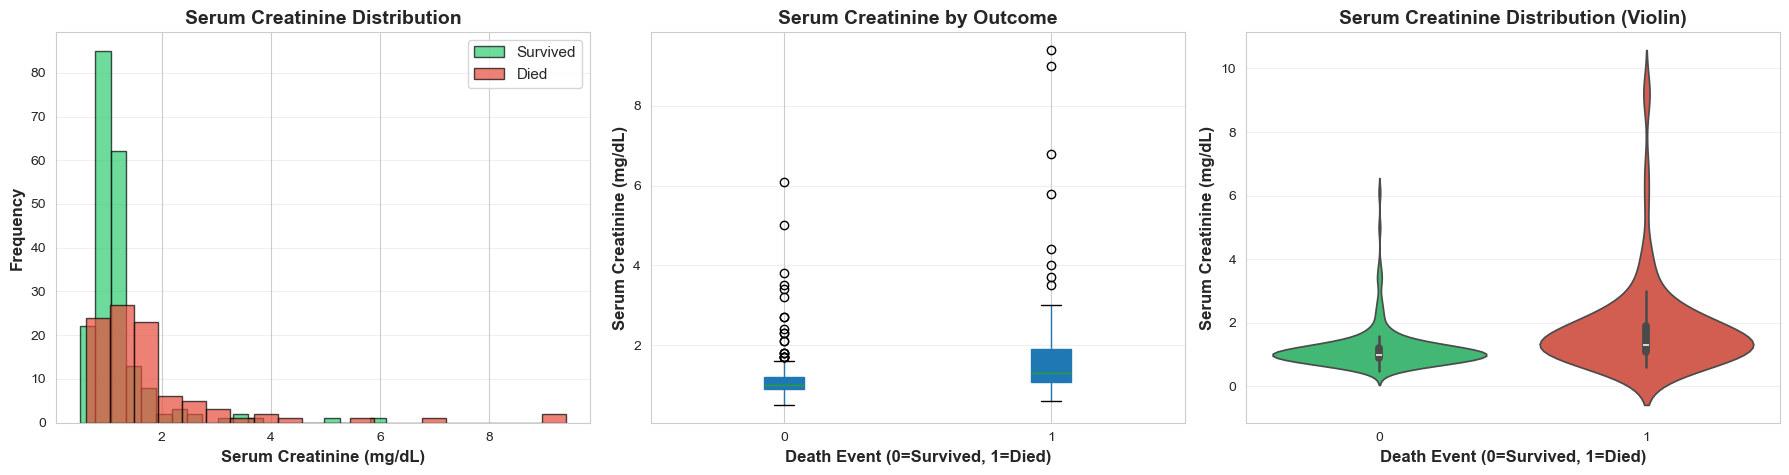


Serum Creatinine Statistics by Outcome:
Survived - Mean: 1.18 mg/dL, Median: 1.00 mg/dL, Std: 0.65
Died - Mean: 1.84 mg/dL, Median: 1.30 mg/dL, Std: 1.47

Difference (Died - Survived): 0.65 mg/dL


In [19]:
# Serum creatinine analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution by outcome
survived_sc = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
died_sc = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

axes[0].hist(survived_sc, bins=20, alpha=0.7, label='Survived', color='#2ecc71', edgecolor='black')
axes[0].hist(died_sc, bins=20, alpha=0.7, label='Died', color='#e74c3c', edgecolor='black')
axes[0].set_xlabel('Serum Creatinine (mg/dL)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Serum Creatinine Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
df.boxplot(column='serum_creatinine', by='DEATH_EVENT', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Death Event (0=Survived, 1=Died)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Serum Creatinine (mg/dL)', fontsize=12, fontweight='bold')
axes[1].set_title('Serum Creatinine by Outcome', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
plt.suptitle('')

# Violin plot
sns.violinplot(data=df, x='DEATH_EVENT', y='serum_creatinine', ax=axes[2],
               palette=['#2ecc71', '#e74c3c'])
axes[2].set_xlabel('Death Event (0=Survived, 1=Died)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Serum Creatinine (mg/dL)', fontsize=12, fontweight='bold')
axes[2].set_title('Serum Creatinine Distribution (Violin)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\nSerum Creatinine Statistics by Outcome:")
print("=" * 50)
print(f"Survived - Mean: {survived_sc.mean():.2f} mg/dL, Median: {survived_sc.median():.2f} mg/dL, Std: {survived_sc.std():.2f}")
print(f"Died - Mean: {died_sc.mean():.2f} mg/dL, Median: {died_sc.median():.2f} mg/dL, Std: {died_sc.std():.2f}")
print(f"\nDifference (Died - Survived): {died_sc.mean() - survived_sc.mean():.2f} mg/dL")


### 5.6 Additional Key Visualizations


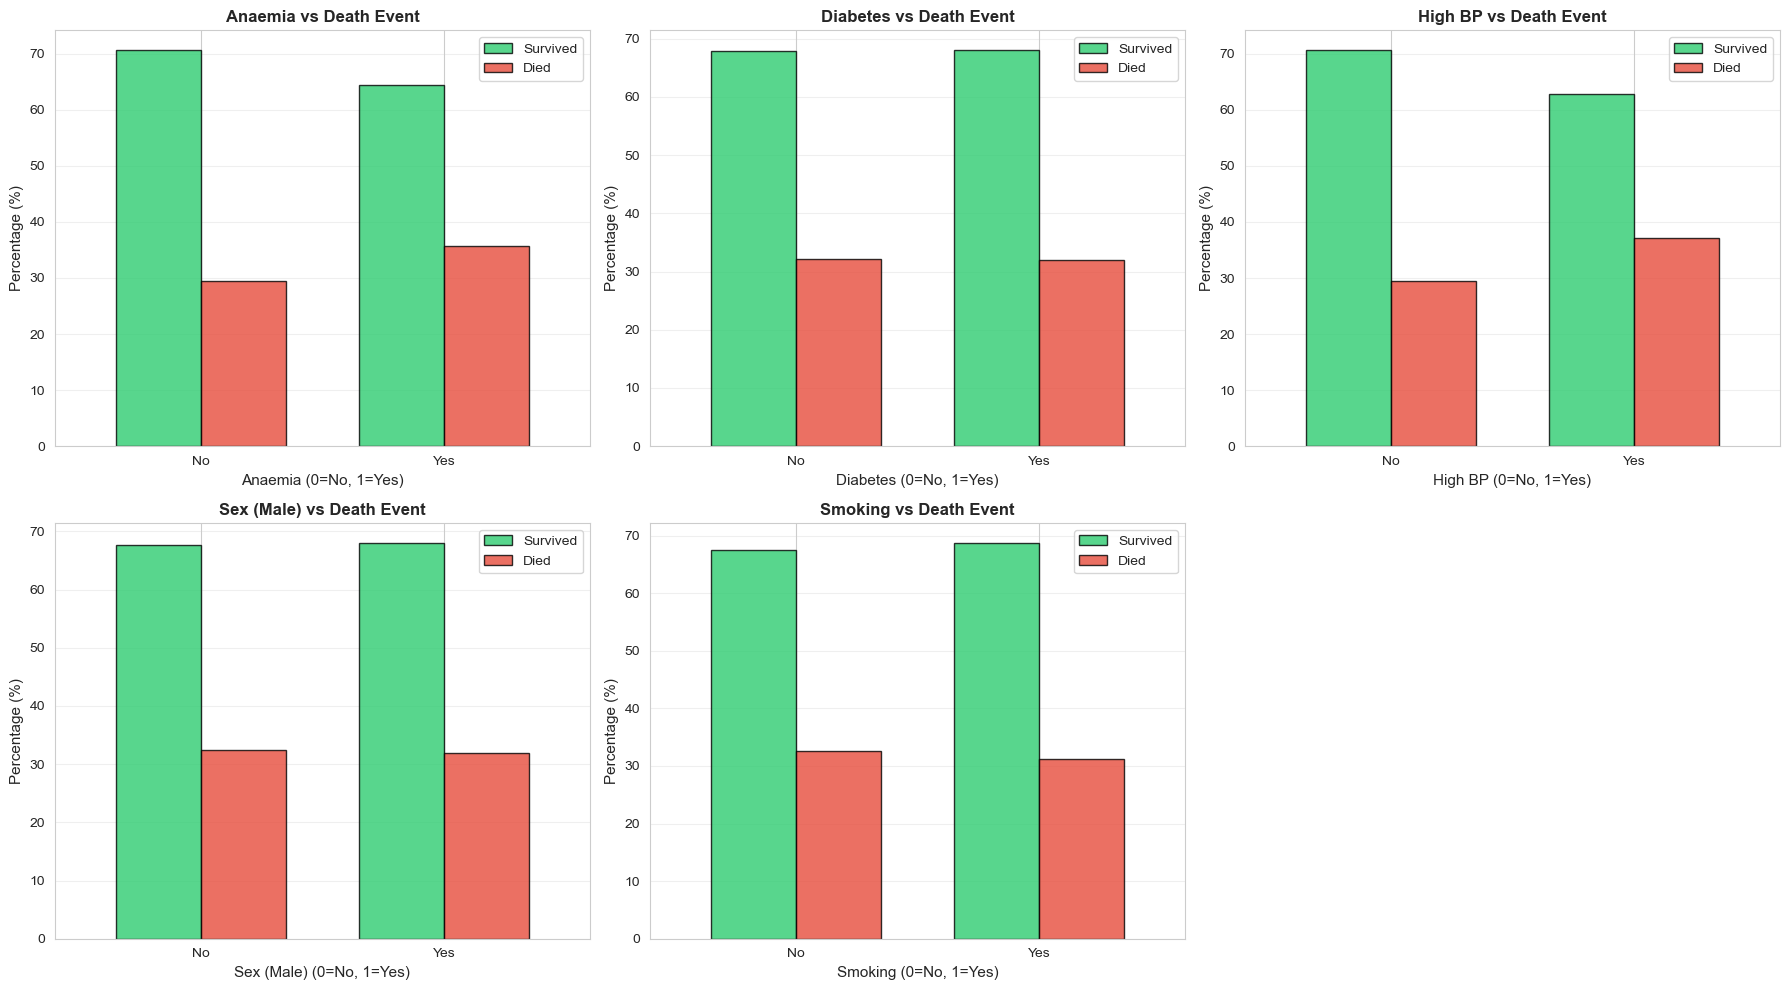

In [20]:
# Binary features analysis
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
feature_labels = ['Anaemia', 'Diabetes', 'High BP', 'Sex (Male)', 'Smoking']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (feature, label) in enumerate(zip(binary_features, feature_labels)):
    # Create cross-tabulation
    ct = pd.crosstab(df[feature], df['DEATH_EVENT'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], 
            alpha=0.8, edgecolor='black', width=0.7)
    axes[idx].set_title(f'{label} vs Death Event', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(f'{label} (0=No, 1=Yes)', fontsize=11)
    axes[idx].set_ylabel('Percentage (%)', fontsize=11)
    axes[idx].legend(['Survived', 'Died'], loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_xticklabels(['No', 'Yes'], rotation=0)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


## 6. Data Quality Assessment


In [21]:
# Check for outliers using IQR method
print("Outlier Detection (IQR Method):")
print("=" * 50)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")
    else:
        print(f"{col}: No outliers detected")


Outlier Detection (IQR Method):
age: No outliers detected
anaemia: No outliers detected
creatinine_phosphokinase: 29 outliers (9.7%)
diabetes: No outliers detected
ejection_fraction: 2 outliers (0.7%)
high_blood_pressure: No outliers detected
platelets: 21 outliers (7.0%)
serum_creatinine: 29 outliers (9.7%)
serum_sodium: 4 outliers (1.3%)
sex: No outliers detected
smoking: No outliers detected
time: No outliers detected
DEATH_EVENT: No outliers detected


## 7. Summary and Conclusions


In [22]:
print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*70)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Total features: {len(df.columns)}")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print("\n2. TARGET VARIABLE (DEATH_EVENT):")
death_counts = df['DEATH_EVENT'].value_counts()
print(f"   - Survived: {death_counts[0]} ({death_counts[0]/len(df)*100:.1f}%)")
print(f"   - Died: {death_counts[1]} ({death_counts[1]/len(df)*100:.1f}%)")
print(f"   - Class imbalance ratio: {death_counts[0]/death_counts[1]:.2f}:1")

print("\n3. KEY FINDINGS:")
corr_with_death = df.corr()['DEATH_EVENT'].sort_values(ascending=False)
top_positive = corr_with_death[corr_with_death > 0].sort_values(ascending=False)[1:4]
top_negative = corr_with_death[corr_with_death < 0].sort_values()[0:3]

print("   Top features positively correlated with death:")
for feat, corr in top_positive.items():
    print(f"      - {feat}: {corr:.3f}")

print("   Top features negatively correlated with death:")
for feat, corr in top_negative.items():
    print(f"      - {feat}: {corr:.3f}")

print("\n4. DATA QUALITY:")
print("   ✓ No missing values")
print("   ✓ No duplicate records")
print("   ✓ All features have appropriate data types")
print("   ✓ Data is ready for modeling")

print("\n" + "="*70)
print("EDA completed successfully!")
print("="*70)



EXPLORATORY DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total samples: 299
   - Total features: 13
   - Missing values: 0
   - Duplicate rows: 0

2. TARGET VARIABLE (DEATH_EVENT):
   - Survived: 203 (67.9%)
   - Died: 96 (32.1%)
   - Class imbalance ratio: 2.11:1

3. KEY FINDINGS:
   Top features positively correlated with death:
      - serum_creatinine: 0.294
      - age: 0.254
      - high_blood_pressure: 0.079
   Top features negatively correlated with death:
      - time: -0.527
      - ejection_fraction: -0.269
      - serum_sodium: -0.195

4. DATA QUALITY:
   ✓ No missing values
   ✓ No duplicate records
   ✓ All features have appropriate data types
   ✓ Data is ready for modeling

EDA completed successfully!
